#  Deep Learning Case Study

## 1. Load required packages

In [1]:
# import some basics
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

# import sklearn backend things
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.utils import check_random_state

# import sklearn classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# import keras utilities for dataloading
from keras import backend as K
from keras.datasets import mnist,cifar10,fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.utils import to_categorical

Using TensorFlow backend.


In [2]:
%matplotlib inline

## 2. Download dataset with Keras

We work with on of three datasets: [MNIST](http://yann.lecun.com/exdb/mnist/), [CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html), [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist)

### <span style="color:blue">TODO: Experiment with each of the three datasets!</span>

Download the data with Keras, already split between train and test sets

In [3]:
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
#(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

## 3. Analyze and process dataset

In [4]:
# input image dimensions
n_channels = 1 if len(X_train.shape) < 4 else X_train.shape[3]
img_rows = X_train.shape[1]
img_cols = X_train.shape[2]

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], n_channels, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], n_channels, img_rows, img_cols)
    input_shape = (n_channels, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, n_channels)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, n_channels)
    input_shape = (img_rows, img_cols, n_channels)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [5]:
num_classes = len(set(np.ravel(y_train)))

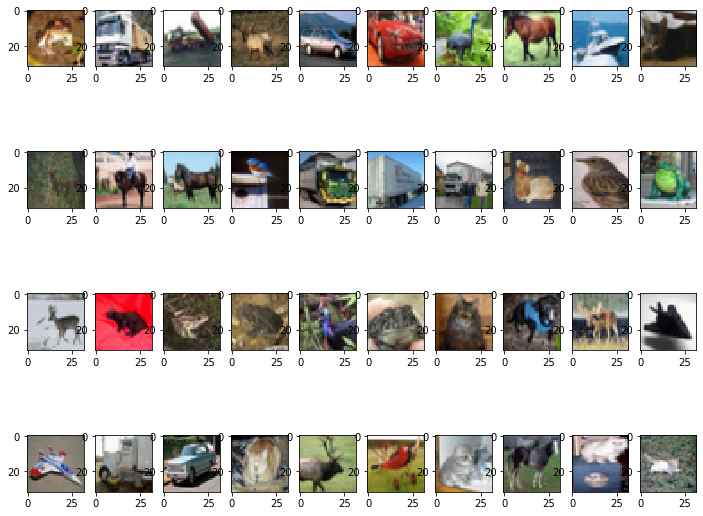

In [6]:
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(np.squeeze(X_train[i,:,:,:]),interpolation='nearest',cmap='gray')
plt.show()

### Transform data from matrix shape (e.g. 28x28) to vector shape (e.g. 784-dimensional)

In [7]:
X_train = X_train.reshape((X_train.shape[0],-1))
X_test  = X_test.reshape((X_test.shape[0],-1))

In [8]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

### Scale data

In [9]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 4. Split into train and test set

### Already done during loading

## 5. Choose classifier method and fit on data

### <span style="color:blue">TODO: Extend and reduce the number of layers and observe performance!</span>

In [10]:
batch_size = 128
epochs = 5

In [14]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [15]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               786688    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 803,786
Trainable params: 803,786
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

h = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1,\
              validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 3s 58us/step - loss: 2.0124 - accuracy: 0.2604 - val_loss: 1.8224 - val_accuracy: 0.3583
Epoch 2/5
50000/50000 [==============================] - 2s 50us/step - loss: 1.8846 - accuracy: 0.3198 - val_loss: 1.7496 - val_accuracy: 0.3782
Epoch 3/5
50000/50000 [==============================] - 2s 50us/step - loss: 1.8347 - accuracy: 0.3376 - val_loss: 1.6926 - val_accuracy: 0.4029
Epoch 4/5
50000/50000 [==============================] - 2s 49us/step - loss: 1.7987 - accuracy: 0.3535 - val_loss: 1.6507 - val_accuracy: 0.4177
Epoch 5/5
50000/50000 [==============================] - 3s 51us/step - loss: 1.7688 - accuracy: 0.3647 - val_loss: 1.6348 - val_accuracy: 0.4253


## 6. Use trained model to predict labels for train and test set

In [17]:
train_score = model.evaluate(X_train, y_train, batch_size=128, verbose=0)
test_score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
print("Train score: %.4f" % train_score[1])
print("Test score:  %.4f" % test_score[1])

Train score: 0.4290
Test score:  0.4253


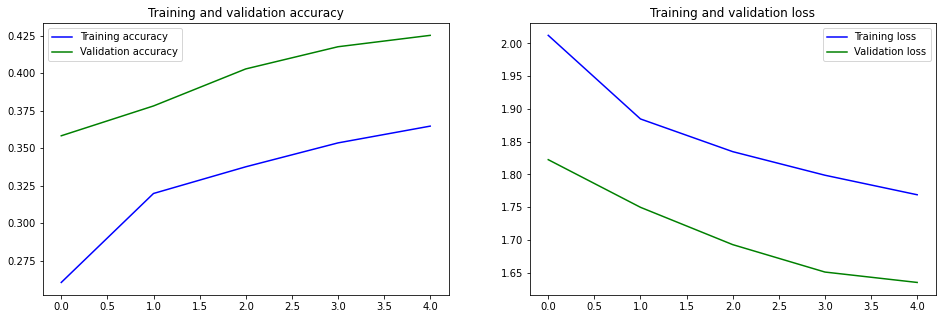

In [18]:
#print(h.history.keys())
accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
y_pred = model.predict(X_test)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(matrix)

[[335  70  73  31  38  11  50  55 282  55]
 [ 16 610   4  39  18  24  53  30  95 111]
 [ 74  37 225  72 157  42 272  53  46  22]
 [  8  37  71 291  57 119 274  55  36  52]
 [ 31  20 110  51 323  24 302  78  45  16]
 [  6  23  79 217  68 253 226  60  45  23]
 [  2  23  52  55  74  18 732  17  14  13]
 [ 19  35  55  77 126  49 118 435  23  63]
 [ 51 119  13  38  19   7  30  17 637  69]
 [ 11 268   7  33  13  12  77  50 117 412]]


## ONLY FOR MNIST: Try your own handwriting

In [21]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 1-( 0.2989 * r + 0.5870 * g + 0.1140 * b)
    gray = gray/np.max(gray)
    return gray

In [37]:
folder = 'data/digits/'
imgfile = '7.png'
img = rgb2gray(mpimg.imread(folder + imgfile))
img = np.reshape(img,(1,784))
img = scaler.transform(img)

In [38]:
ynew = model.predict_classes(img,batch_size=None)
p = model.predict(img)

The predicted digit class is: 7


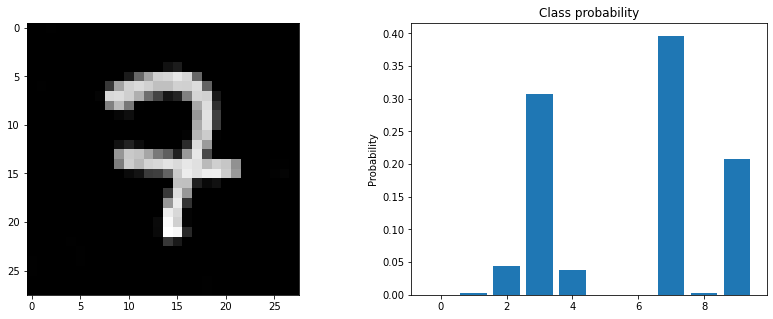

In [39]:
print(f"The predicted digit class is: {int(ynew)}")
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.imshow(np.reshape(img,(28,28)), cmap='gray', vmin=0, vmax=1);
plt.subplot(1, 2, 2)
plt.bar(list(range(0,10)),np.reshape(p,(10,)));
plt.ylabel('Probability');
plt.title('Class probability');